In [16]:
fp = open("RnEmbPot_500_meanSphere.txt")

x = []
y = []

for line in fp:
    sline = line.split()
    x.append(float(sline[0]))
    y.append(float(sline[1]))

fp.close()

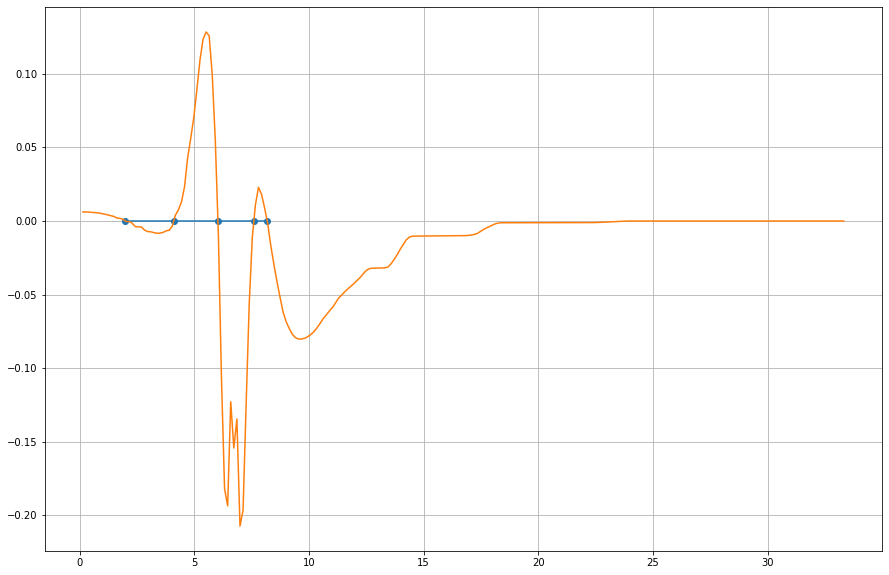

In [21]:
import matplotlib.pyplot as plt
from scipy import interpolate

spline = interpolate.InterpolatedUnivariateSpline(x, y)

xp = spline.roots()
yp = []
for v in xp:
    yp.append(0.0)

plt.rcParams["figure.figsize"] = (15,10)
plt.grid()
plt.plot(xp, yp, marker="o",)
plt.plot(x, y)
plt.show()

In [46]:

dx = x[1] - x[0]
xmodelpot = []
ymodelpot = []

print("Dx: ", dx)

sum = 0.0
bas = 0.0
for i in range(len(x)):
    if x[i] <= xp[0]:
        sum += dx*y[i]
        bas += dx

val = sum/bas

for i in range(len(x)):
    if x[i] <= xp[0]:
        xmodelpot.append(x[i])
        ymodelpot.append(0.0)

print("First: " , sum, val, bas)

#second step
sum = 0.0
bas = 0.0
for i in range(len(x)):
    if x[i] > xp[0] and x[i] <= xp[1]:
        sum += dx*y[i]
        bas += dx

val = sum/bas

for i in range(len(x)):
    if x[i] > xp[0] and x[i] <= xp[1]:
        xmodelpot.append(x[i])
        ymodelpot.append(val)

print("Second: ", sum, val, bas)

#third step
sum = 0.0
bas = 0.0
for i in range(len(x)):
    if x[i] > xp[1] and x[i] <= xp[2]:
        sum += dx*y[i]
        bas += dx

val = sum/bas

for i in range(len(x)):
    if x[i] > xp[1] and x[i] <= xp[2]:
        xmodelpot.append(x[i])
        ymodelpot.append(val)

print("Third: ", sum, val, bas)

#fourth step
sum = 0.0
bas = 0.0
for i in range(len(x)):
    if x[i] > xp[2] and x[i] <= xp[3]:
        sum += dx*y[i]
        bas += dx

val = sum/bas

for i in range(len(x)):
    if x[i] > xp[2] and x[i] <= xp[3]:
        xmodelpot.append(x[i])
        ymodelpot.append(val)

print("Fourth: ", sum, val, bas)

#fifth step
sum = 0.0
bas = 0.0
for i in range(len(x)):
    if x[i] > xp[3] and x[i] <= xp[4]:
        sum += dx*y[i]
        bas += dx

val = sum/bas

for i in range(len(x)):
    if x[i] > xp[3] and x[i] <= xp[4]:
        xmodelpot.append(x[i])
        ymodelpot.append(val)

print("Fifth: ", sum, val, bas)

#sixth step
xmax = 19.0 # looking at values 
sum = 0.0
bas = 0.0
for i in range(len(x)):
    if x[i] > xp[4] and x[i] <= xmax:
        sum += dx*y[i]
        bas += dx

val = sum/bas

for i in range(len(x)):
    if x[i] > xp[4] and x[i] <= xmax:
        xmodelpot.append(x[i])
        ymodelpot.append(val)

print("Sixth: ", sum, val, bas)

for i in range(len(x)):
    if x[i] > xmax:
        xmodelpot.append(x[i])
        ymodelpot.append(0.0)

#check 
sum = 0.0
for i in range(len(xmodelpot)):
    if xmodelpot[i] > xp[0] and xmodelpot[i] <= xp[1]:
        sum += dx*ymodelpot[i]

print("Check second: ", sum)


Dx:  0.134384
First:  0.008264692268092143 0.0043928976813205544 1.8813760000000006
Second:  -0.011183551730331589 -0.0052013036012153535 2.1501440000000005
Third:  0.1272205957380157 0.06762103680392205 1.8813760000000006
Fourth:  -0.20174609261062487 -0.12510547672504713 1.6126080000000005
Fifth:  0.008152106880895984 0.015165694727229402 0.537536
Sixth:  -0.3312876553239242 -0.030434955451406242 10.885104000000009
Check second:  -0.011183551730331585


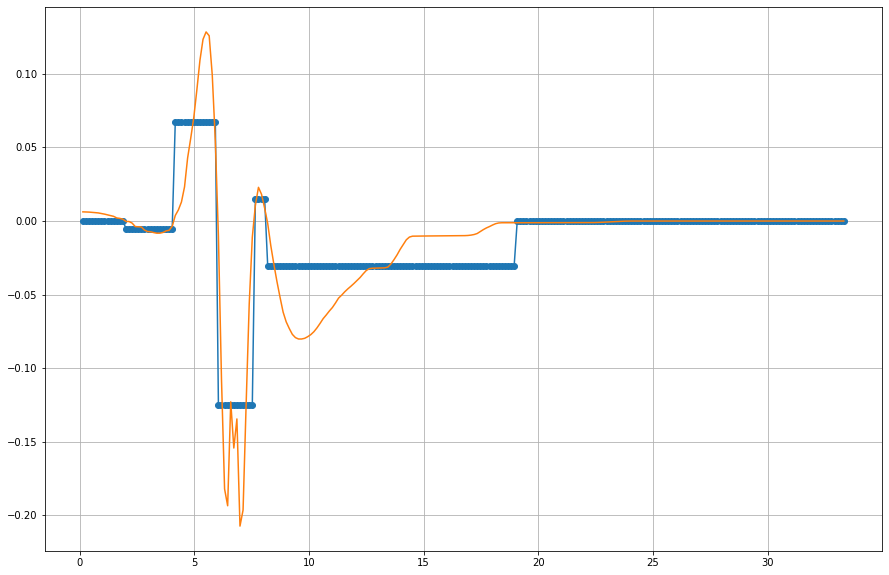

In [44]:
plt.rcParams["figure.figsize"] = (15,10)
plt.grid()
plt.plot(xmodelpot, ymodelpot, marker="o",)
plt.plot(x, y)
plt.show()

In [45]:
for i, xval in enumerate(xmodelpot):
    print (xval, ymodelpot[i] )

0.134384 0.0
0.268768 0.0
0.403152 0.0
0.537536 0.0
0.6719200000000001 0.0
0.8063040000000001 0.0
0.9406880000000002 0.0
1.0750720000000002 0.0
1.2094560000000003 0.0
1.3438400000000004 0.0
1.4782240000000004 0.0
1.6126080000000005 0.0
1.7469920000000005 0.0
1.8813760000000006 0.0
2.0157600000000007 -0.0052013036012153535
2.1501440000000005 -0.0052013036012153535
2.2845280000000003 -0.0052013036012153535
2.418912 -0.0052013036012153535
2.553296 -0.0052013036012153535
2.68768 -0.0052013036012153535
2.8220639999999997 -0.0052013036012153535
2.9564479999999995 -0.0052013036012153535
3.0908319999999994 -0.0052013036012153535
3.225215999999999 -0.0052013036012153535
3.359599999999999 -0.0052013036012153535
3.493983999999999 -0.0052013036012153535
3.6283679999999987 -0.0052013036012153535
3.7627519999999985 -0.0052013036012153535
3.8971359999999984 -0.0052013036012153535
4.031519999999999 -0.0052013036012153535
4.1659039999999985 0.06762103680392205
4.300287999999998 0.06762103680392205
4.43

In [49]:
import numpy as np

fp = open("gridRn.txt", "r")

w = []
xs = []
ys = []
zs = []

for line in fp:
    sline = line.split()
    if len(sline) == 4:
        x = np.float64(sline[0])
        y = np.float64(sline[1])
        z = np.float64(sline[2])
        v = np.float64(sline[3])
        w.append(v)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    else:
        print("ERROR at line ", line)

fp.close()

In [55]:
import math 

s = []
for i, v in enumerate(w):
    val = 0.0

    x = xs[i]
    y = ys[i]
    z = zs[i]

    r = math.sqrt(x**2 + y**2 + z**2)

    for j, xval in enumerate(xmodelpot):
        if xval >= r:
            val = ymodelpot[j]
            break
    
    s.append(val)

fp = open("multistepsmodelpot_Rn.txt", "w")

for v in s:
    print(v, file=fp)

fp.close()

